<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>
<h1><center>Ensemble Techniques: Bagging and Random Forest - Week 1</center></h1>


<center><img src="https://images.pexels.com/photos/3184360/pexels-photo-3184360.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<b><h2><center>HR Employee Attrition Case Study</center></h2></b>

## Problem Statement

### Background :
McCurr Consultancy is an MNC that has thousands of employees spread across the globe. The company believes in hiring the best talent available and retaining them for as long as possible. A huge amount of resources is spent on retaining existing employees through various initiatives. The Head of People Operations wants to bring down the cost of retaining employees. For this, he proposes limiting the incentives to only those employees who are at risk of attrition. As a recently hired Data Scientist in the People Operations Department, you have been asked to identify patterns in characteristics of employees who leave the organization. Also, you have to use this information to predict if an employee is at risk of attrition. This information will be used to target them with incentives.

### Objective :

You, as a Data Scientist at McCurr Consultancy, are tasked with analyzing the data provided to identify the different factors that drive attrition, and build a model that can help to predict attrition.


### Dataset :
The data contains demographic details, work-related metrics and attrition flag.

* EmployeeNumber - Employee Identifier
* Attrition - Did the employee attrite?
* Age - Age of the employee
* BusinessTravel - Travel commitments for the job
* DailyRate - Data description not available**
* Department - Employee Department
* DistanceFromHome - Distance from work to home (in km)
* Education - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* EducationField - Field of Education
* EmployeeCount - Employee Count in a row
* EnvironmentSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* Gender - Employee's gender
* HourlyRate - Data description not available**
* JobInvolvement - 1-Low, 2-Medium, 3-High, 4-Very High
* JobLevel - Level of job (1 to 5)
* JobRole - Job Roles
* JobSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* MaritalStatus - Marital Status
* MonthlyIncome - Monthly Salary
* MonthlyRate - Data description not available**
* NumCompaniesWorked - Number of companies worked at
* Over18 - Over 18 years of age?
* OverTime - Overtime?
* PercentSalaryHike - The percentage increase in salary last year
* PerformanceRating - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* RelationshipSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* StandardHours - Standard Hours
* StockOptionLevel - Stock Option Level
* TotalWorkingYears - Total years worked
* TrainingTimesLastYear - Number of training attended last year
* WorkLifeBalance - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* YearsAtCompany - Years at Company
* YearsInCurrentRole - Years in the current role
* YearsSinceLastPromotion - Years since the last promotion
* YearsWithCurrManager - Years with the current manager

** **In the real world, you will not find definitions for some of your variables. It is a part of the analysis to figure out what they might mean.**

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
hr=pd.read_csv("HR_Employee_Attrition-1.csv")

In [3]:
# copying data to another varaible to avoid any changes to original data
data=hr.copy()

## Overview of the dataset

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.tail()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2935,2936,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
2936,2937,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
2937,2938,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
2938,2939,No,49,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8
2939,2940,No,34,Travel_Rarely,628,Research & Development,8,3,Medical,1,...,1,80,0,6,3,4,4,3,1,2


### Understand the shape of the dataset.

In [6]:
data.shape

(2940, 35)

* The dataset has 2940 rows and 35 columns of data

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EmployeeCount             2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

**Observations -**
* There are no null values in the dataset.
* We can convert the object type columns to categories.

`converting "objects" to "category" reduces the data space required to store the dataframe`

### Fixing the data types

In [8]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [9]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeNumber            2940 non-null   int64   
 1   Attrition                 2940 non-null   category
 2   Age                       2940 non-null   int64   
 3   BusinessTravel            2940 non-null   category
 4   DailyRate                 2940 non-null   int64   
 5   Department                2940 non-null   category
 6   DistanceFromHome          2940 non-null   int64   
 7   Education                 2940 non-null   int64   
 8   EducationField            2940 non-null   category
 9   EmployeeCount             2940 non-null   int64   
 10  EnvironmentSatisfaction   2940 non-null   int64   
 11  Gender                    2940 non-null   category
 12  HourlyRate                2940 non-null   int64   
 13  JobInvolvement            2940 non-null   int64 

`we can see that the memory usage has decreased from 804 KB to 624.4 KB`, this technique is generally useful for bigger datasets.

### Summary of the dataset

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,2940.0,1470.500000,848.849221,1.0,735.75,1470.5,2205.25,2940.0
Age,2940.0,36.923810,9.133819,18.0,30.00,36.0,43.00,60.0
DailyRate,2940.0,802.485714,403.440447,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.00,7.0,14.00,29.0
Education,2940.0,2.912925,1.023991,1.0,2.00,3.0,4.00,5.0
EmployeeCount,2940.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,2940.0,2.721769,1.092896,1.0,2.00,3.0,4.00,4.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.00,66.0,84.00,100.0
JobInvolvement,2940.0,2.729932,0.711440,1.0,2.00,3.0,3.00,4.0
JobLevel,2940.0,2.063946,1.106752,1.0,1.00,2.0,3.00,5.0


* EmployeeNumber is an ID variable and not useful for predictive modelling.
* Age of the employees range from 18 to 60 years and the average age is 36 years.
* EmployeeCount has only 1 as the value in all the rows and can be dropped as it will not be adding any information to our analysis.
* Standard Hours has only 80 as the value in all the rows and can be dropped as it will not be adding any information to our analysis.
* Hourly rate has a huge range, but we do not know what this variable stands for, yet. The same goes for daily and monthly rates.
* Monthly Income has a high range and the difference in mean and median indicate the presence of outliers.

In [12]:
data.describe(include=['category']).T

,count,unique,top,freq
Attrition,2940,2,No,2466
BusinessTravel,2940,3,Travel_Rarely,2086
Department,2940,3,Research & Development,1922
EducationField,2940,6,Life Sciences,1212
Gender,2940,2,Male,1764
JobRole,2940,9,Sales Executive,652
MaritalStatus,2940,3,Married,1346
Over18,2940,1,Y,2940
OverTime,2940,2,No,2108


* Attrition is our target variable with 84% records 'No' or employee will not attrite.
* Majority of the employees have low business travel requirements
* Majority of the employees are from the Research and Development department.
* All employees are over 18 years of age -  we can drop this variable as it will not be adding any information to our analysis.
* There are more male employees than female employees.

**Dropping columns which are not adding any information.**

In [13]:
data.drop(['EmployeeNumber','EmployeeCount','StandardHours','Over18'],axis=1,inplace=True)

**Let's look at the unique values of all the categories**

In [14]:
cols_cat= data.select_dtypes(['category'])

In [15]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in Attrition are :
Attrition
No     2466
Yes     474
Name: count, dtype: int64
**************************************************
Unique values in BusinessTravel are :
BusinessTravel
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: count, dtype: int64
**************************************************
Unique values in Department are :
Department
Research & Development    1922
Sales                      892
Human Resources            126
Name: count, dtype: int64
**************************************************
Unique values in EducationField are :
EducationField
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      1764
Female    1176
Name: count, dtype: int64
**************************************************
Unique va

In [16]:
df = data.copy()

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

### **Note**: The EDA section has been covered multiple times in the previous case studies. In this case study, we will mainly focus on the model building aspects. We will only be looking at the key observations from EDA. The detailed EDA can be found in the <a href = #link1>appendix section</a>.

**The below functions need to be defined to carry out the EDA.**

In [17]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [19]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate analysis

#### Observations on NumCompaniesWorked

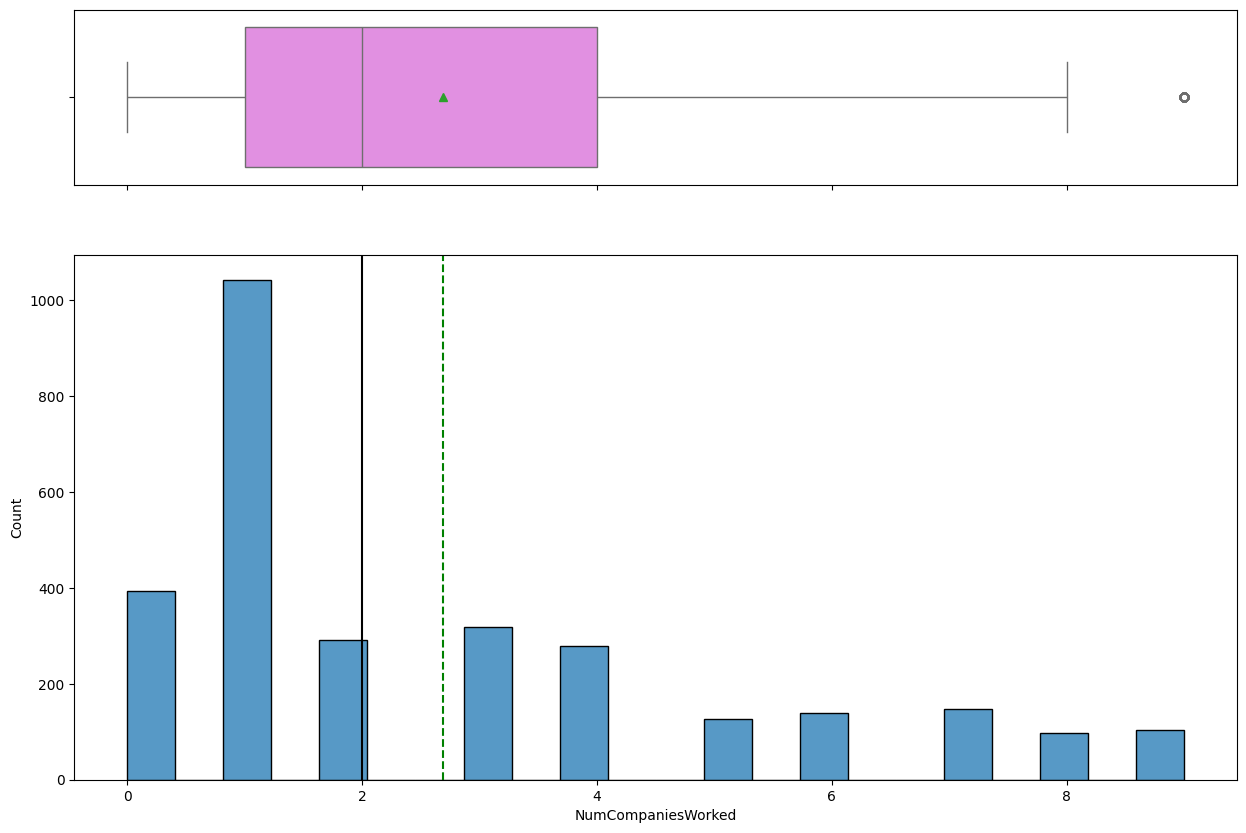

In [20]:
histogram_boxplot(data,'NumCompaniesWorked')

* On average, people have worked at 2.5 companies. Median is 2.
* Most people have worked at only 1 company.
* Nearly 350 employees have worked at 0 companies, clearly this means this variable indicates the number of companies worked at before joining ours.
* There is an outlier employee who has changed 9 companies.

#### Observations on YearsInCurrentRole

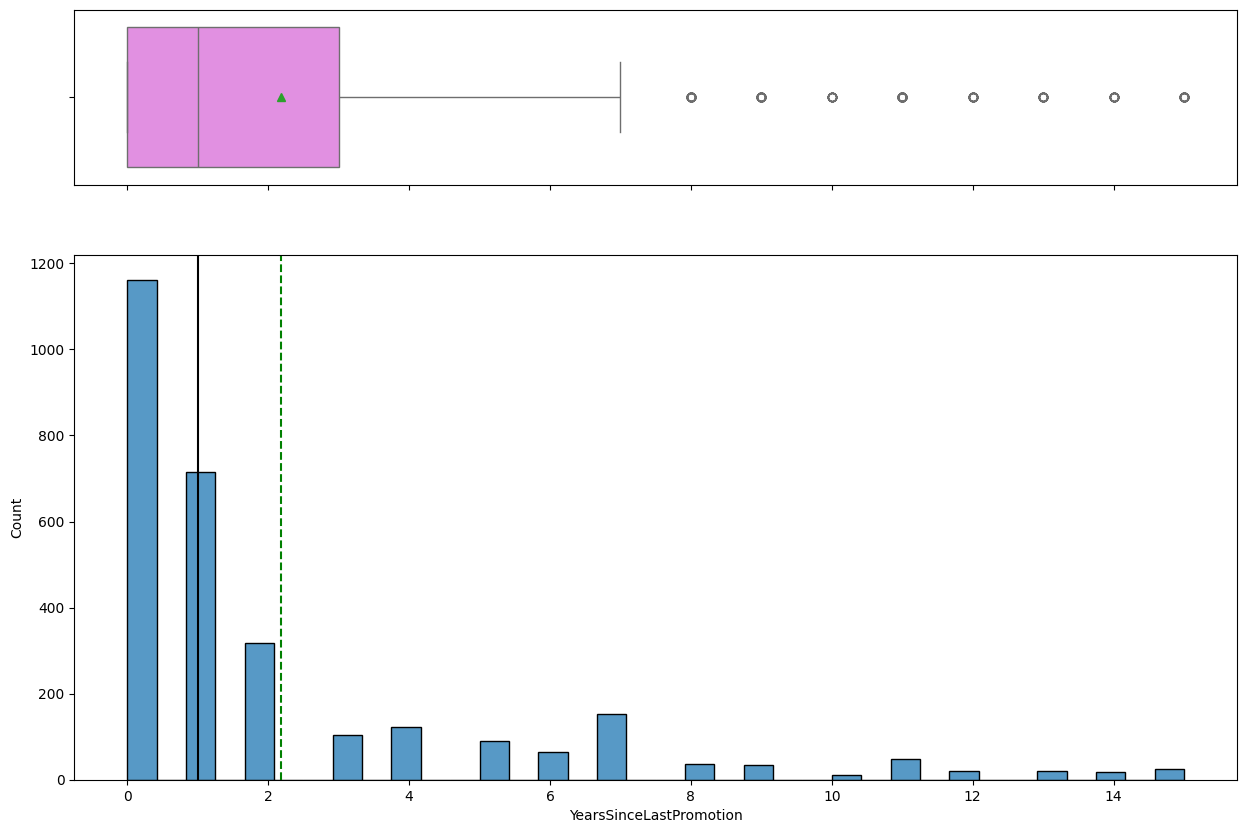

In [21]:
histogram_boxplot(data,'YearsSinceLastPromotion')

* There are a few outliers in this right-skewed distribution, these are probably the people at the highest positions.
* Most employees have had a promotion in the last 2 years.
* 0 years since last promotion indicates many employees were recently promoted.

### Observations on JobRole

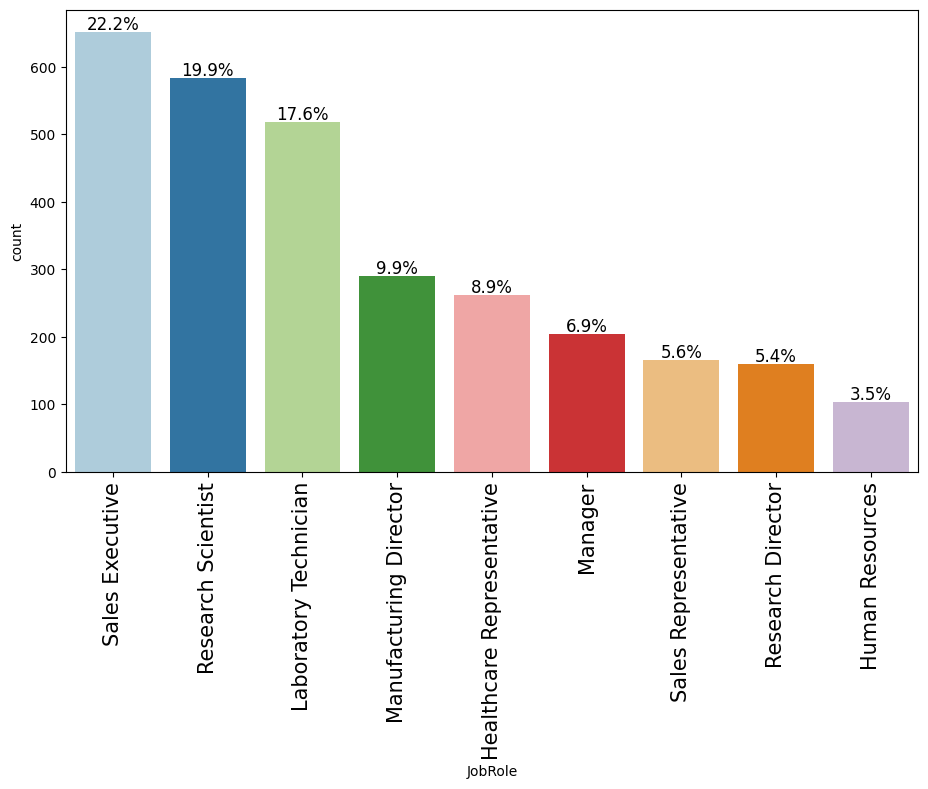

In [22]:
labeled_barplot(data, "JobRole", perc=True)

* 22.2% of employees are Sales Executives followed by 20% of Research Scientists.

#### Observations on Attrition

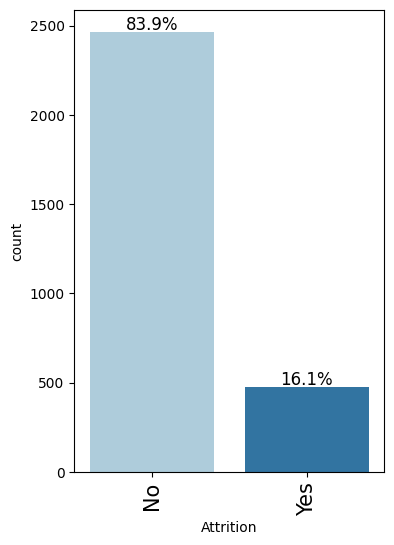

In [23]:
labeled_barplot(data, "Attrition", perc=True)

* 16% of the data points represent the employees who are going to attrite.

### Bivariate Analysis

#### Correlation check

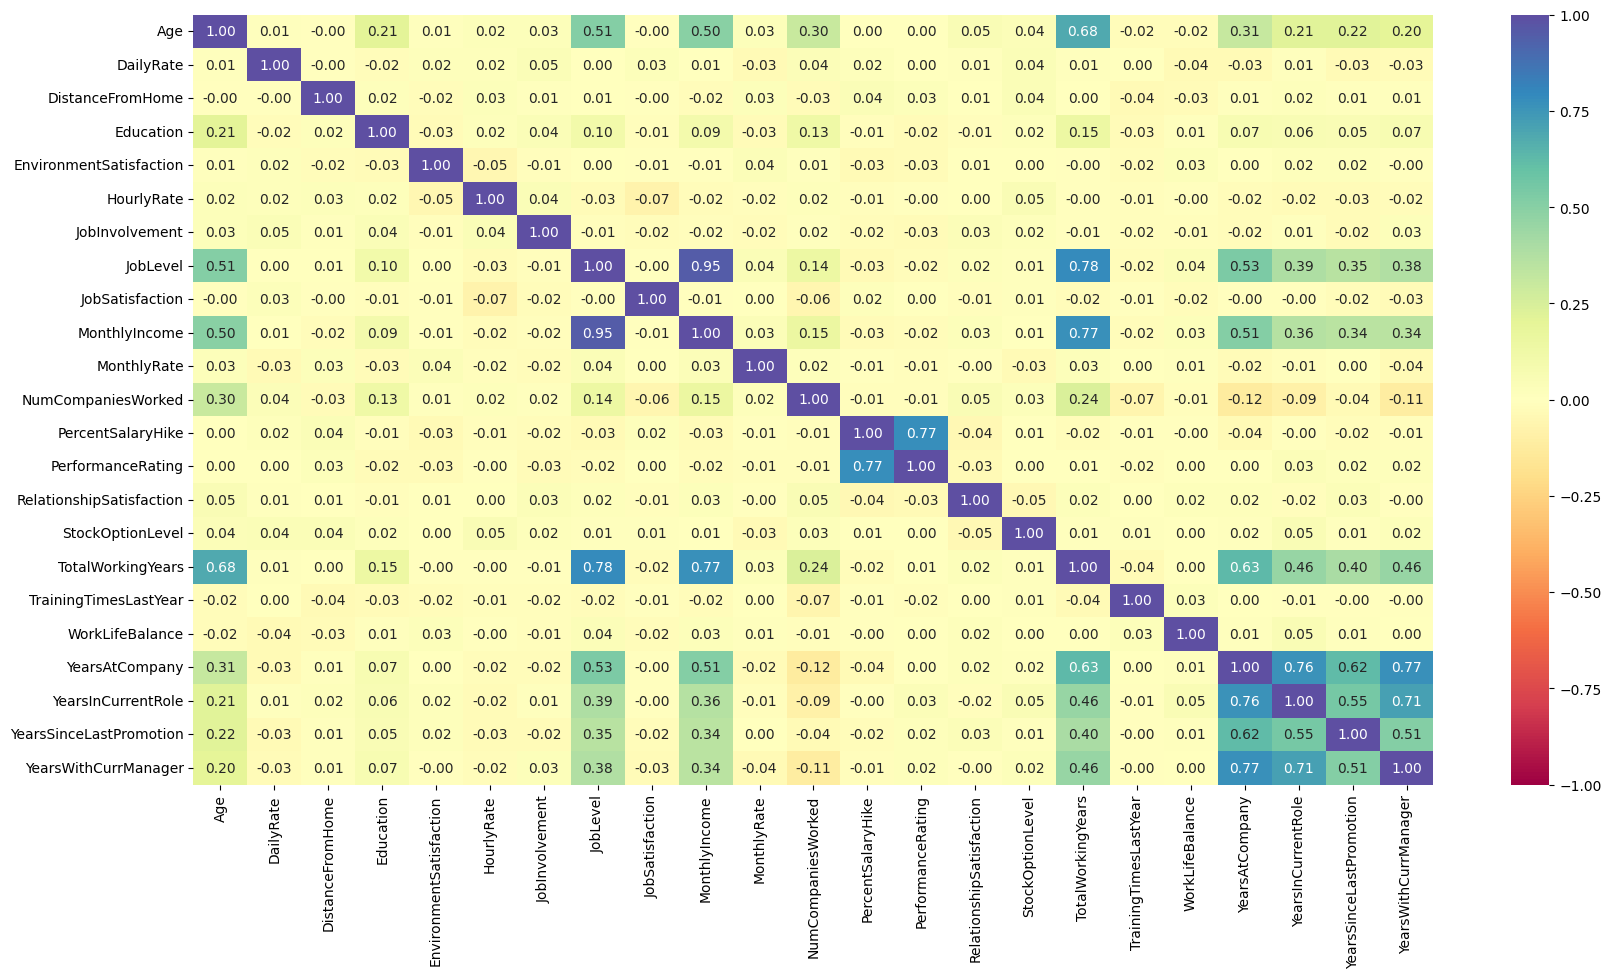

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(numeric_only=True),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

* There are a few variables that are correlated with each other but there are no surprises here.
* Unsurprisingly, TotalWorkingYears is highly correlated to Job Level (i.e., the longer you work the higher job level you achieve).
* HourlyRate, DailyRate, and MonthlyRate are completely uncorrelated with each other which makes it harder to understand what these variables might represent.
* MonthlyIncome is highly correlated to Job Level.
* Age is positively correlated JobLevel and Education (i.e., the older an employee is, the more educated and at a higher job level they are).
* Work-life Balance is correlated with none of the numeric values.

#### Attrition vs Earnings of employee

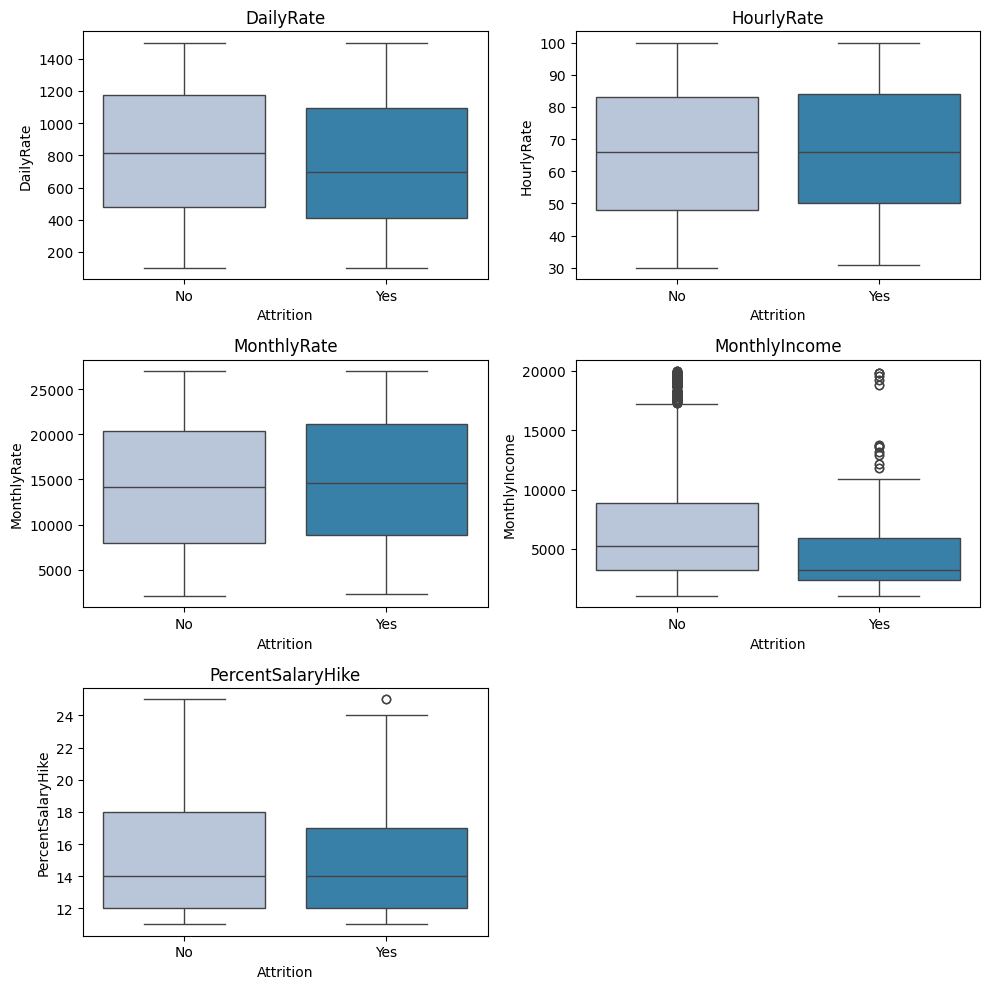

In [25]:
cols = data[['DailyRate','HourlyRate','MonthlyRate','MonthlyIncome','PercentSalaryHike']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(x=data["Attrition"],y=data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Employees having lower Daily rate and less monthly wage are more likely to attrite.
* Monthly rate and the hourly rate doesn't seem to have any effect on attrition.
* Lesser salary hike also contributes to attrition.

#### Attrition vs Previous job roles

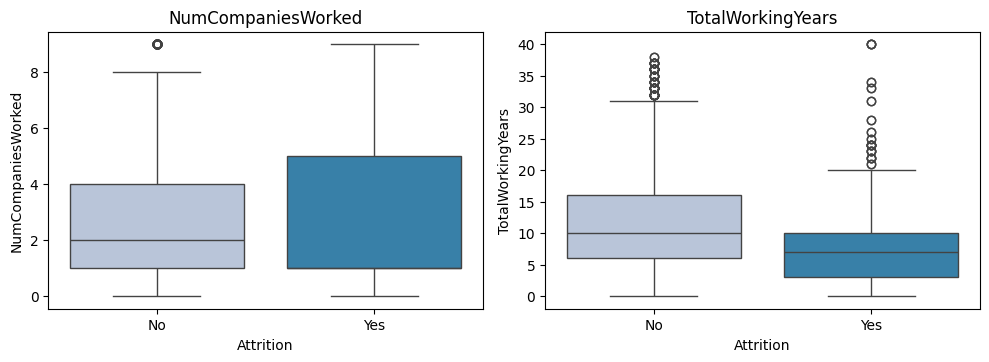

In [26]:
cols = data[['NumCompaniesWorked','TotalWorkingYears']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(x=data["Attrition"],y=data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Employees who have worked in more companies generally tend to switch more jobs hence attriting.
* Employees who attrite generally have lesser years of experience.

Attrition            No  Yes   All
BusinessTravel                    
All                2466  474  2940
Travel_Rarely      1774  312  2086
Travel_Frequently   416  138   554
Non-Travel          276   24   300
------------------------------------------------------------------------------------------------------------------------


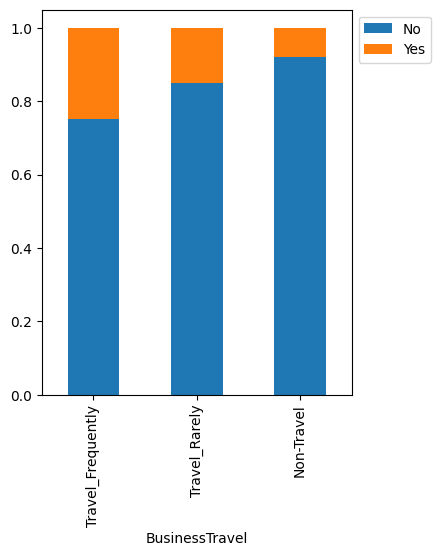

In [27]:
stacked_barplot(data, "BusinessTravel", "Attrition")

* As the travel frequency increases, the Attrition rate increases.
* There's ~22% probability of employees attriting who travel frequently.

Attrition                  No  Yes   All
EnvironmentSatisfaction                 
All                      2466  474  2940
1                         424  144   568
3                         782  124   906
4                         772  120   892
2                         488   86   574
------------------------------------------------------------------------------------------------------------------------


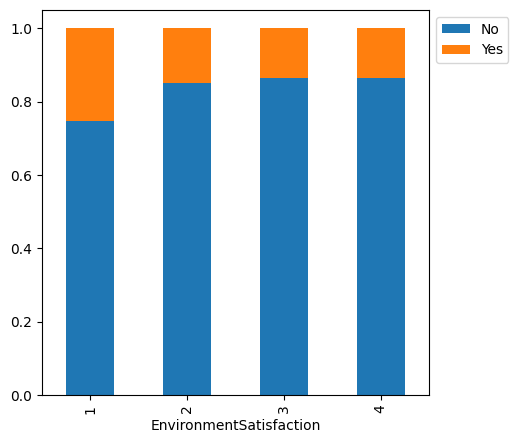

In [28]:
stacked_barplot(data,"EnvironmentSatisfaction","Attrition")

* Employees who say they have low satisfaction with their work environments are likely to attrite.
* There's a ~40% probability of attrition among employees with low ratings for environment satisfaction.

Attrition         No  Yes   All
JobInvolvement                 
All             2466  474  2940
3               1486  250  1736
2                608  142   750
1                110   56   166
4                262   26   288
------------------------------------------------------------------------------------------------------------------------


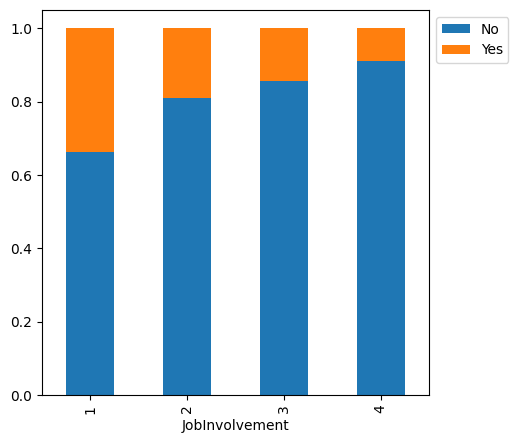

In [29]:
stacked_barplot(data,"JobInvolvement","Attrition")

* Job Involvement looks like a very strong indicator of attrition.
* Higher the job involvement, greater is the chance that the employee will stay with us and not attrite.
* Employees unhappy with their job involment have ~55% probability of attriting (those who rated 0 and 1).
* Further investigation to understand how this variable was collected will give more insights.

Attrition                    No  Yes   All
JobRole                                   
All                        2466  474  2940
Laboratory Technician       394  124   518
Sales Executive             538  114   652
Research Scientist          490   94   584
Sales Representative        100   66   166
Human Resources              80   24   104
Manufacturing Director      270   20   290
Healthcare Representative   244   18   262
Manager                     194   10   204
Research Director           156    4   160
------------------------------------------------------------------------------------------------------------------------


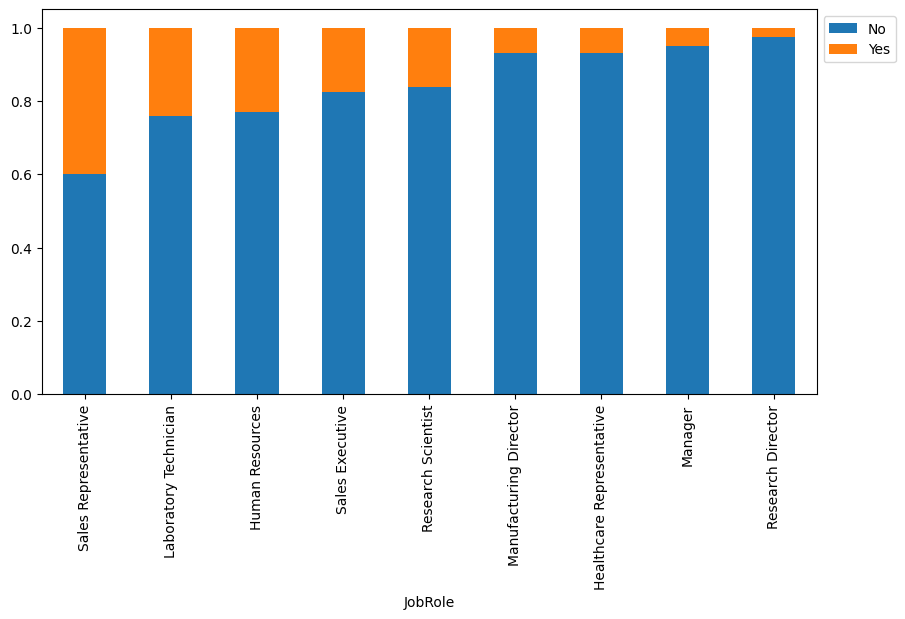

In [30]:
stacked_barplot(data,"JobRole","Attrition")

* Sales Executives have an attrition probability of >40%.
* Laboratory Technicians and Human Resource personnel also have high probabilities of attrition.
* Attrition probability among Research Directors, Manufacturing directors Healthcare representatives, and Managers is much lower than the average attrition probability of 16%.

Attrition          No  Yes   All
JobSatisfaction                 
All              2466  474  2940
3                 738  146   884
1                 446  132   578
4                 814  104   918
2                 468   92   560
------------------------------------------------------------------------------------------------------------------------


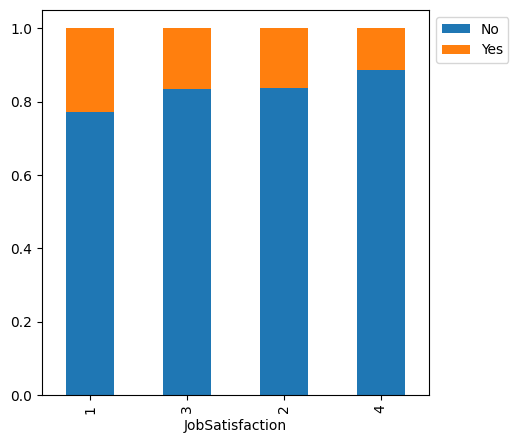

In [31]:
stacked_barplot(data,"JobSatisfaction","Attrition")

* As Job satisfaction increases, attrition probability decreases. This is intuitive but the attrition probability of people who rate 2 and 3 being almost the same is peculiar.  

Attrition    No  Yes   All
OverTime                  
All        2466  474  2940
Yes         578  254   832
No         1888  220  2108
------------------------------------------------------------------------------------------------------------------------


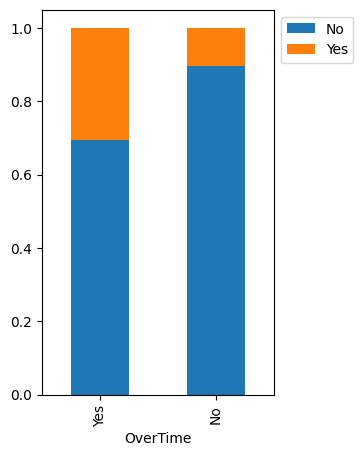

In [32]:
stacked_barplot(data,"OverTime","Attrition")

* Employees who work overtime tend to attrite more.
* There a ~35% probability of attrition among employees working overtime.

Attrition           No  Yes   All
StockOptionLevel                 
All               2466  474  2940
0                  954  308  1262
1                 1080  112  1192
3                  140   30   170
2                  292   24   316
------------------------------------------------------------------------------------------------------------------------


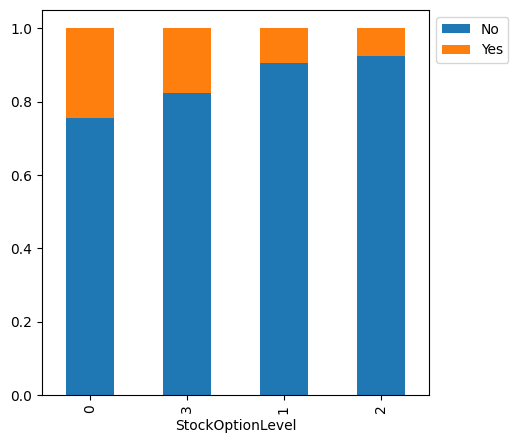

In [33]:
stacked_barplot(data,"StockOptionLevel","Attrition")

* ~22% Employees with highest and lowest stock options attrite the more than others.
* Company should investigate more on why employees with highest stock options are attriting and take this as an opportunity to re-consider their stocks policy.

Attrition          No  Yes   All
WorkLifeBalance                 
All              2466  474  2940
3                1532  254  1786
2                 572  116   688
4                 252   54   306
1                 110   50   160
------------------------------------------------------------------------------------------------------------------------


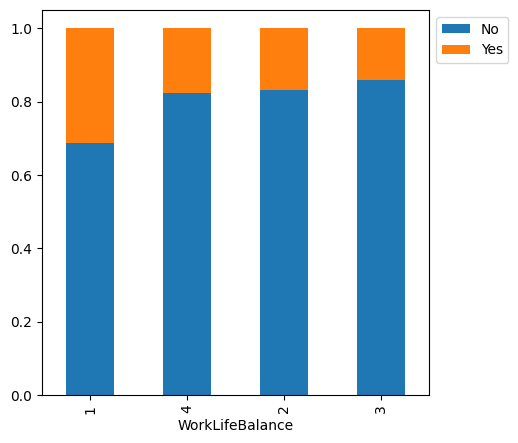

In [34]:
stacked_barplot(data,"WorkLifeBalance","Attrition")

* Low work-life balance rating leads people to attrite, this is a good factor to preempt at attrition risk employees.

**Checking if performace rating and salary hike are related-**

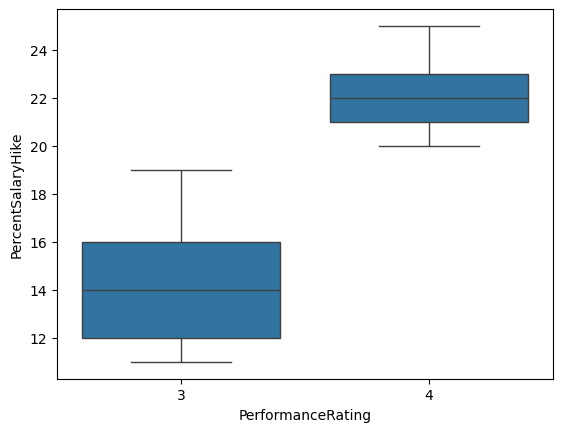

In [35]:
sns.boxplot(x=data['PerformanceRating'],y=data['PercentSalaryHike'])
plt.show()

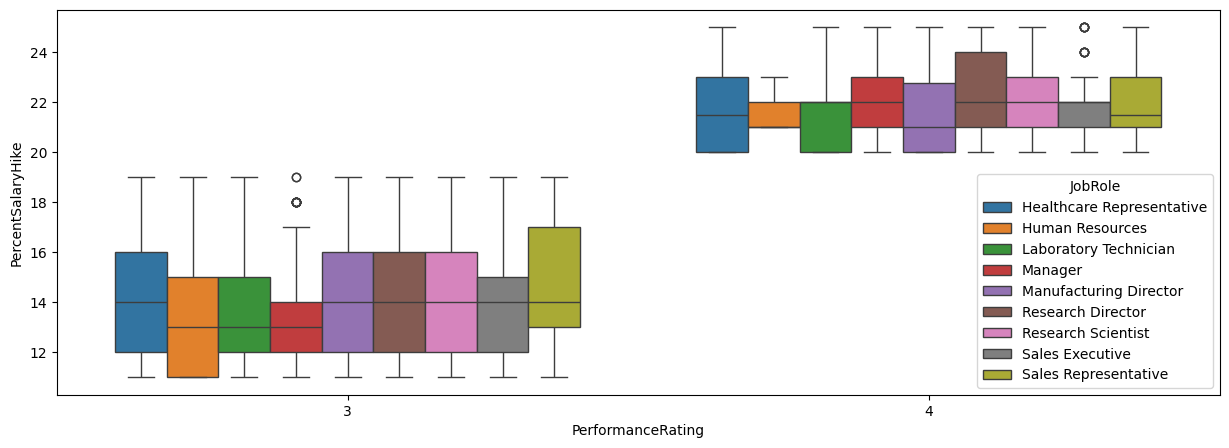

In [36]:
plt.figure(figsize=(15,5))
sns.boxplot(x=data['PerformanceRating'],y=data['PercentSalaryHike'],hue=data['JobRole'])
plt.show()

**Observations-**
* Salary hikes are a function of Performance ratings.
* We have to investigate why the employees who get Excellent(3) and Outstanding(4) Performance rating attrite and how then can they be retained.

## Data Preprocessing

### Outlier Detection and Treatment

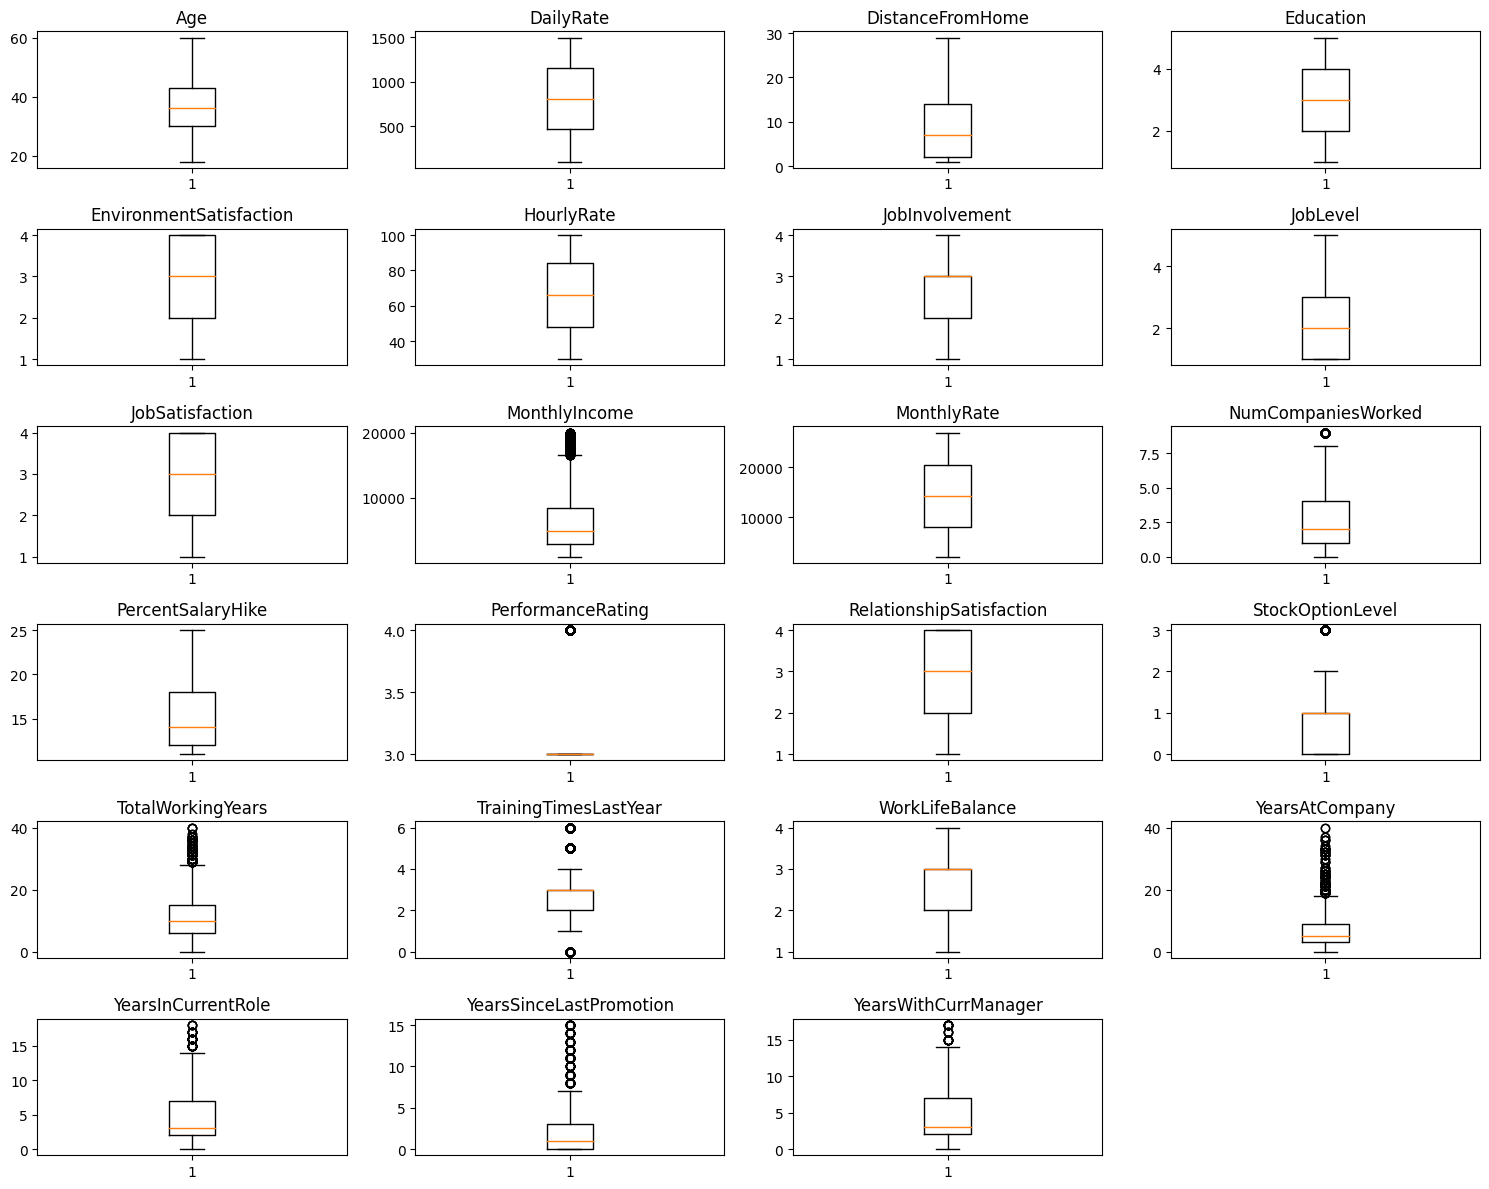

In [37]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values.

### Data Preparataion for model building

* When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets.
* This is done using the `stratify` parameter in the train_test_split function.

In [38]:
data['Attrition'] = data['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

X = data.drop(['Attrition'],axis=1)
y = data['Attrition']

X = pd.get_dummies(X,drop_first=True)

In [39]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(2058, 44) (882, 44)


In [40]:
y.value_counts(1)

,proportion
Attrition,
0,0.838776
1,0.161224


In [41]:
y_test.value_counts(1)

,proportion
Attrition,
0,0.839002
1,0.160998


**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [42]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [43]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Model Building

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting an employee will attrite and the employee doesn't attrite
2. Predicting an employee will not attrite and the employee attrites

### Which case is more important?
* Predicting that employee will not attrite but he attrites i.e. losing on a valuable employee or asset.

### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the company can provide incentives to control attrition rate especially for top-performers thereby optimizing the overall project cost in retaining the best talent.

### Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [44]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)

In [45]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

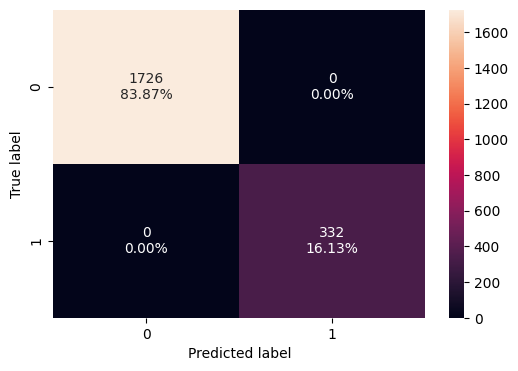

In [46]:
confusion_matrix_sklearn(dtree, X_train, y_train)

**Confusion Matrix -**

* Employee left and the model predicted it correctly that is employee will attrite :  True Positive (observed=1,predicted=1)

* Employee didn't leave and the model predicted employee will attrite : False Positive (observed=0,predicted=1)

* Employee didn't leave and the model predicted employee will not attrite : True Negative (observed=0,predicted=0)

* Employee left and the model predicted that employee won't : False Negative (observed=1,predicted=0)

In [47]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


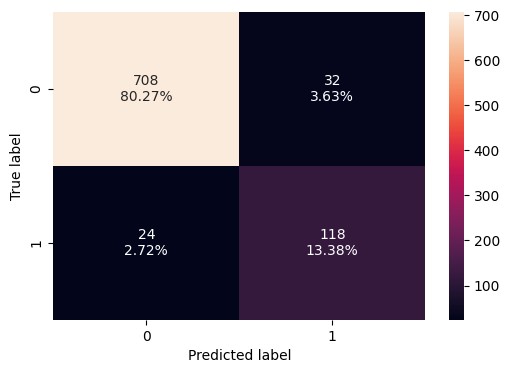

In [48]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [49]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.936508  0.830986   0.786667  0.808219


* Decision tree is working well on the training data but is not able to generalize well on the test data concerning the recall.

### Bagging Classifier

In [50]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

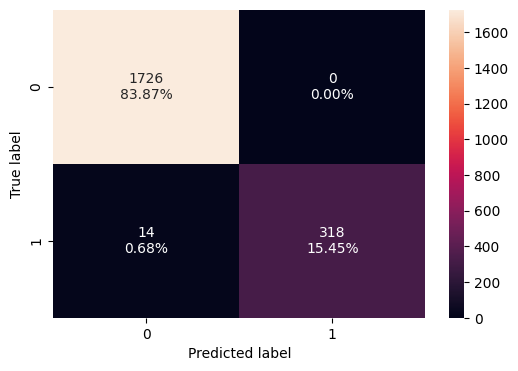

In [51]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [52]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.993197  0.957831        1.0  0.978462


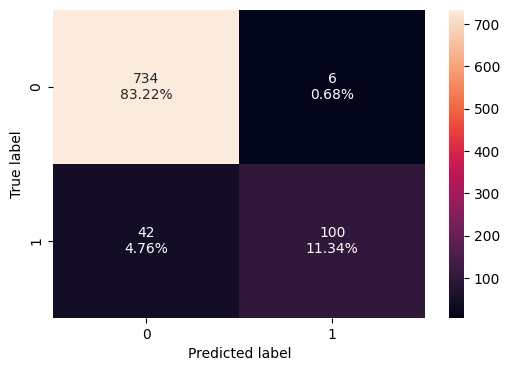

In [53]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [54]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.945578  0.704225   0.943396  0.806452


* Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of recall.

**Bagging Classifier with weighted decision tree**

In [56]:
bagging_wt = BaggingClassifier(DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight={0: 0.17,
                                                                 1: 0.83},
                                                   random_state=1),
                  random_state=1)

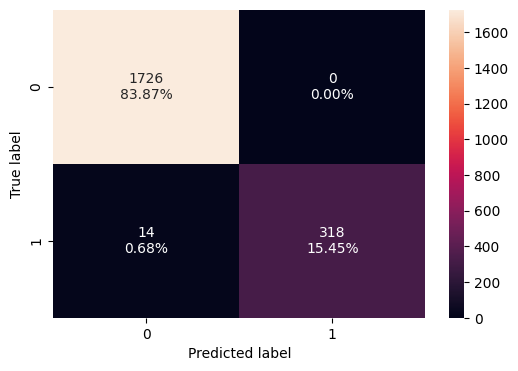

In [57]:
confusion_matrix_sklearn(bagging_wt,X_train,y_train)

In [58]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.993197  0.957831        1.0  0.978462


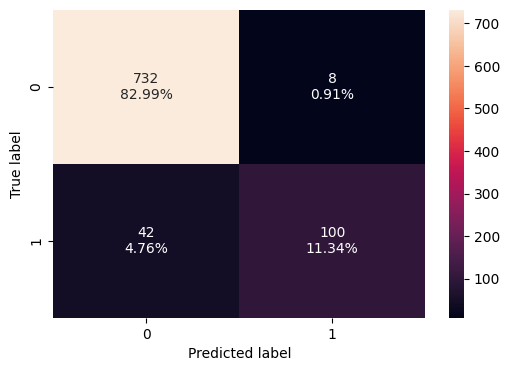

In [59]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [60]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision   F1
0  0.943311  0.704225   0.925926  0.8


* Bagging classifier with a weighted decision tree is giving very good accuracy and prediction but is not able to generalize well on test data in terms of recall.

### Random Forest

In [61]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

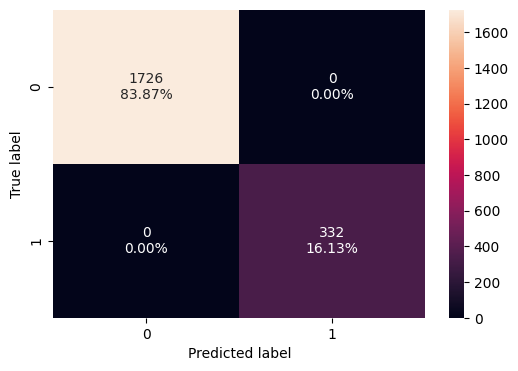

In [62]:
confusion_matrix_sklearn(rf,X_train,y_train)

In [63]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


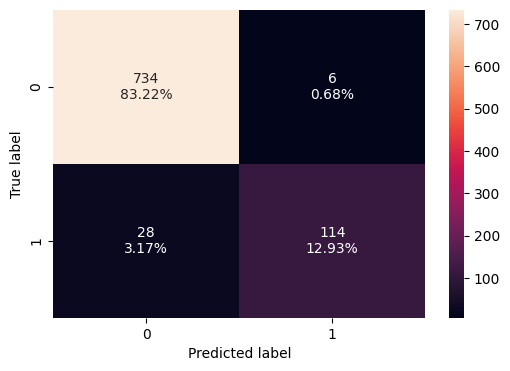

In [64]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [65]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.961451  0.802817       0.95  0.870229


* Random Forest has performed well in terms of accuracy and precision, but it is not able to generalize well on the test data in terms of recall.

**Random forest with class weights**

In [66]:
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

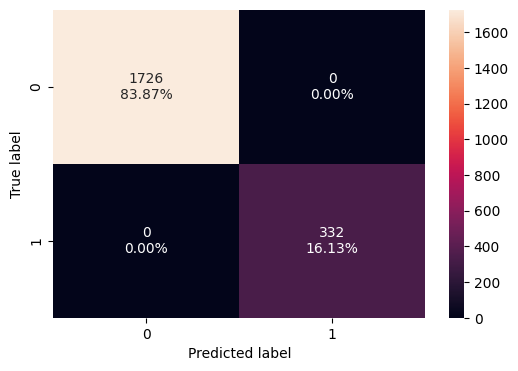

In [67]:
confusion_matrix_sklearn(rf_wt, X_train,y_train)

In [68]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


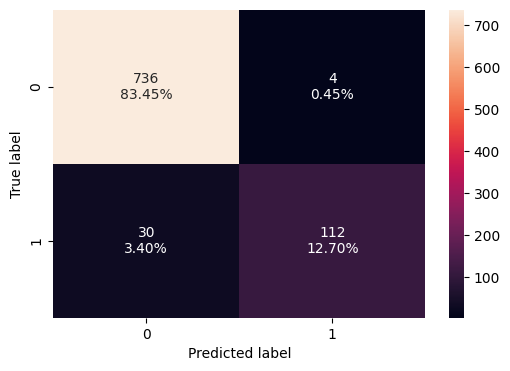

In [69]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [70]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.961451  0.788732   0.965517  0.868217


* There is not much improvement in metrics of weighted random forest as compared to the unweighted random forest.

## Tuning Models

### Using GridSearch for Hyperparameter tuning model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

### Tuning Decision Tree

In [71]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.17,1:0.83},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=8,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=10, random_state=1)

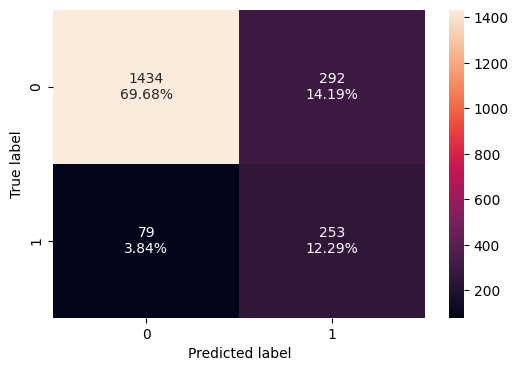

In [72]:
confusion_matrix_sklearn(dtree_estimator, X_train,y_train)

In [73]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.819728  0.762048    0.46422  0.576967


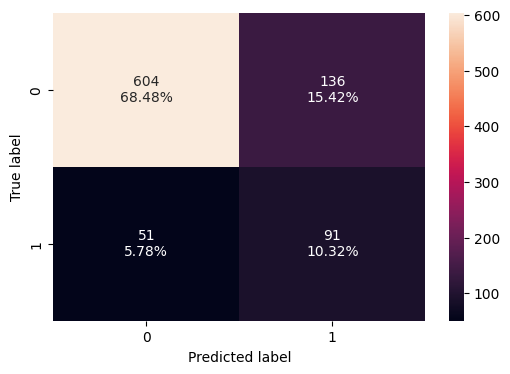

In [74]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [75]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.787982  0.640845   0.400881  0.493225


* Overfitting in decision tree has reduced but the recall has also reduced.

### Tuning Bagging Classifier

In [77]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.13,1:0.87},random_state=1)
param_grid = {
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(cl1, random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight={0: 0.13,
                                                                 1: 0.87},
                                                   random_state=1),
                  max_features=1, n_estimators=51, random_state=1)

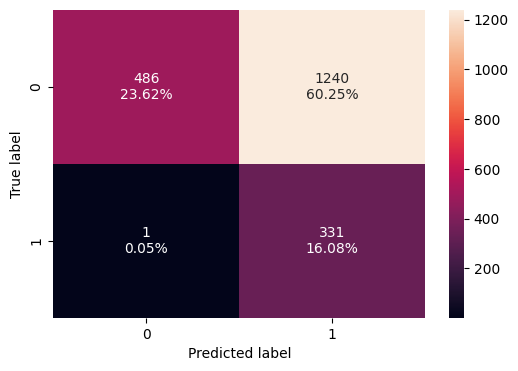

In [78]:
confusion_matrix_sklearn(bagging_estimator, X_train,y_train)

In [79]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.396987  0.996988   0.210694  0.347872


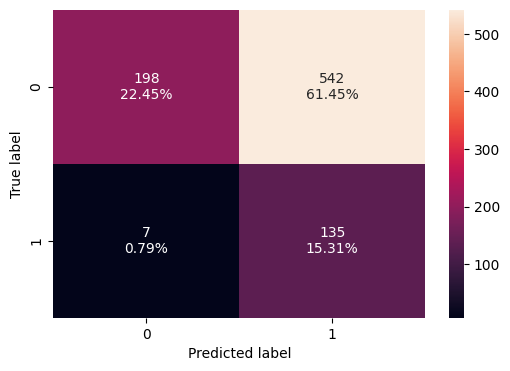

In [80]:
confusion_matrix_sklearn(bagging_estimator, X_test,y_test)

In [81]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision       F1
0  0.377551  0.950704   0.199409  0.32967


* Recall has improved but the accuracy and precision of the model has dropped drastically which is an indication that overall the model is making many mistakes.

### Tuning Random Forest

In [ ]:
# Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(X_train, y_train)

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_train,y_train)

In [ ]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

In [ ]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

* Random forest after tuning has given same performance as un-tuned random forest.

### Comparing all the models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,bagging_model_train_perf.T, bagging_wt_model_train_perf.T,rf_model_train_perf.T,
    rf_wt_model_train_perf.T,dtree_estimator_model_train_perf.T, bagging_estimator_model_train_perf.T,
     rf_estimator_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# training performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,bagging_model_test_perf.T, bagging_wt_model_test_perf.T,rf_model_test_perf.T,
    rf_wt_model_test_perf.T,dtree_estimator_model_test_perf.T, bagging_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Testing performance comparison:")
models_test_comp_df

* Decision tree performed well on training and test set.
* Bagging classifier overfitted the data before and after tuning.
* Random Forest with default parameters performed same as after tuning - As the final results depend on the parameters used/checked using GridSearchCV, There may be yet better parameters which may result in a better performance.

### Feature importance of Random Forest

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
feature_names = X_train.columns

In [ ]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Monthly income is the most important feature for prediction followed by Overtime, Daily Rate and Age.

## Business Insights and Recommendations


* We have been able to build a predictive model:
  a) that company can deploy this model to identify employees who are at the risk of attrition.
  b) that company can use to find the drivers of attrition.
  c) based on which company can take appropriate actions to build better retention policies.

* Factors that drive attrition - Monthly Income, Overtime, and Age.
* Monthly Income: Employees with lower income attrite more, which is also logical as they might get offers with higher pay in different organizations - the company should make sure that all employees are compensated based on industry standards.

* Overtime: Those employees who have to work overtime are the ones who attrite more - the company can provide some additional incentives to such employees to retain them.

* Age: Younger employees are the ones that attrite more- the company can make sure the new joiners have a friendly environment and better opportunities for excelling in their career.

* Distance From home is also an important factor for attrition - employees traveling more distance to reach the workplace are the ones attriting. For such employees, the company can provide cab facilities so that the commute of employees gets easier.

* As work-related travel frequency increases, Attrition rate also increases - the company should

* Training doesn't seem to have an impact on attrition- the company needs to investigate more here, if training does not impact employee retention then better cost planning can be done.

* Employee with more experience and the employees working for most years in the company is the loyal one's and generally do not attrite.

* Highest attrition is in the Sales department more research should go into this to check what is wrong in the sales department?

* Our data collection technique is working well as the ratings given by employees in -Environment Satisfaction, Job Satisfaction, Relationship Satisfaction, and Work-Life Balance shows a difference significant difference between attriting and non-attriting employees. These scales can act as a preliminary step to understand the dissatisfaction of employees - Lower the rating higher are the chances of attrition.

## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

### Univariate analysis

### Observations on Age

In [ ]:
histogram_boxplot(df,'Age')

* Age is looking normally distributed, with a hint of right skew.

### Observations on DailyRate

In [ ]:
histogram_boxplot(df,'DailyRate')

* The daily rate has a fairly uniform distribution with a mean and median at 800.

### Observations on DistanceFromHome

In [ ]:
histogram_boxplot(df,'DistanceFromHome')

* This is a right-skewed distribution.
* Most people live close to work but we do have some employees that live at a distance.

### Observations on HourlyRate

In [ ]:
histogram_boxplot(df,'HourlyRate')

* Quite inline with the daily rate, the hourly rate is also fairly uniformly distributed with mean and median at 65.

### Observations on MonthlyIncome

In [ ]:
histogram_boxplot(df,'MonthlyIncome')

* Income distribution across a unit is almost always right-skewed and similar is the case here.
* As expected, from the boxplot we can see that there are a few outliers who earn much higher than the rest of the employees.

### Observations on MonthlyRate

In [ ]:
histogram_boxplot(df,'MonthlyRate')

* Monthly rate also has a uniform distribution with mean and median close to 14500.

### Observations on NumCompaniesWorked

In [ ]:
histogram_boxplot(df,'NumCompaniesWorked')

* On average, people have worked at 2.5 companies. Median is 2.
* Most people have worked at only 1 company.
* Nearly 350 employees have worked at 0 companies, clearly this means this variable indicates the number of companies worked at before joining ours.
* There is an outlier employee who has changed 9 companies.

### Observations on PercentSalaryHike

In [ ]:
histogram_boxplot(df,'PercentSalaryHike')

* Salary hike is Right skewed. We shall check later if the hike percentage is a function of performance rating or job level.
* Mean percentage salary hike is 15%.

### Observations on TotalWorkingYears

In [ ]:
histogram_boxplot(df,'TotalWorkingYears')

* Age of the employees had a hint of right skew but work experience has a significant right skew.
* From the boxplot, we can observe that this variable contains a few outliers also.

### Observations on YearsAtCompany

In [ ]:
histogram_boxplot(df,'YearsAtCompany')

* Significant right skew in the data.
* The outliers are probably the most loyal employees and it suggests that they would be less likely to attrite.

### Observations on YearsInCurrentRole

In [ ]:
histogram_boxplot(df,'YearsInCurrentRole')

* This distribution has three peaks at 0, 2, and 7.
* There are a few outliers that have stayed in the same role for more than 15 years.

### Observations on YearsInCurrentRole

In [ ]:
histogram_boxplot(df,'YearsSinceLastPromotion')

* There are a few outliers in this right-skewed distribution, these are probably the people at the highest positions.
* Most employees have had a promotion in the last 2 years.
* 0 years since last promotion indicates many employees were recently promoted.

### Observations on YearsWithCurrManager

In [ ]:
histogram_boxplot(df,'YearsWithCurrManager')

* This distribution is very similar to that of 'Years in current role' and that makes sense.
* There are a few outliers in this variable.

### Observations on BusinessTravel

In [ ]:
labeled_barplot(df, "BusinessTravel", perc=True)

* 71% of the employees have travel rarely and 18.8% employees have to travel frequently.

### Observations on Department

In [ ]:
labeled_barplot(df, "Department", perc=True)

* 65.4% of employees in data are from R&D department followed by 30.3% in sales.

### Observations on EducationField

In [ ]:
labeled_barplot(df, "EducationField", perc=True)

* 41.2% of the employees are from a Life Sciences background followed by 31.6% from a medical background.

### Observations on Gender

In [ ]:
labeled_barplot(df, "Gender", perc=True)

* 60% of male employees and 40% of female employees.

### Observations on JobRole

In [ ]:
labeled_barplot(df, "JobRole", perc=True)

* 22.2% of employees are Sales Executives followed by 20% of Research Scientists.

### Observations on MaritalStatus

In [ ]:
labeled_barplot(df, "MaritalStatus", perc=True)

* 45.8% of the employees are married followed by 32% singles.

### Observations on OverTime

In [ ]:
labeled_barplot(df, "OverTime", perc=True)

* 71.7% of the employees are not ready to work over time.

### Observations on Attrition

In [ ]:
labeled_barplot(df, "Attrition", perc=True)

* 16% of the data points represent the employees who are going to attrite.

### Bivariate Analysis

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

* There are a few variables that are correlated with each other but there are no surprises here.
* Unsurprisingly, TotalWorkingYears is highly correlated to Job Level (i.e., the longer you work the higher job level you achieve).
* HourlyRate, DailyRate, and MonthlyRate are completely uncorrelated with each other which makes it harder to understand what these variables might represent.
* MonthlyIncome is highly correlated to Job Level.
* Age is positively correlated JobLevel and Education (i.e., the older an employee is, the more educated and at a higher job level they are).
* Work-life Balance is correlated with none of the numeric values.

In [ ]:
sns.pairplot(df,hue='Attrition')
plt.show()

* We can see varying distributions in variables for Attrition, we should investigate it further.

### Attrition vs Earnings of employee

In [ ]:
cols = df[['DailyRate','HourlyRate','MonthlyRate','MonthlyIncome','PercentSalaryHike']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(x=df["Attrition"],y=df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Employees having lower Daily rate and less monthly wage are more likely to attrite.
* Monthly rate and the hourly rate doesn't seem to have any effect on attrition.
* Lesser salary hike also contributes to attrition.

### Attrition vs Years working in company

In [ ]:
cols = df[['YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager','TrainingTimesLastYear']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(x=df["Attrition"],y=df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Those employees who have spent less time at a company, in a current role or with a manager have higher chances of attriting.
* Training doesn't seem to have an impact on Attrition.

### Attrition vs Previous job roles

In [ ]:
cols = df[['NumCompaniesWorked','TotalWorkingYears']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(x=df["Attrition"],y=df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Employees who have worked in more companies generally tend to switch more jobs hence attriting.
* Employees who attrite generally have lesser years of experience.

In [ ]:
cols = df[['Age','DistanceFromHome','Education']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df["Attrition"],df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Employees who have to travel a more distance from their home attrite more.
* There is no difference in age and education of attriting and non-attriting employees.

In [ ]:
stacked_barplot(df, "BusinessTravel", "Attrition")

* As the travel frequency increases, the Attrition rate increases.
* There's ~22% probability of employees attriting who travel frequently.

In [ ]:
stacked_barplot(df, "Department", "Attrition")

* We saw earlier that majority of the employees work for the R&D department. The probability of attrition is least there.
* Both Sales and HR have similar Attrition probability.

In [ ]:
stacked_barplot(df,"EducationField","Attrition")

* 25% of employees educated in human resources attrite.
* Attrition probability is also high in the case of marketing and technical degree holders.

In [ ]:
stacked_barplot(df,"EnvironmentSatisfaction","Attrition")

* Employees who say they have low satisfaction with their work environments are likely to attrite.
* There's a ~40% probability of attrition among employees with low ratings for environment satisfaction.

In [ ]:
stacked_barplot(df,"JobInvolvement","Attrition")

* Job Involvement looks like a very strong indicator of attrition.
* Higher the job involvement, greater is the chance that the employee will stay with us and not attrite.
* Employees unhappy with their job involment have ~55% probability of attriting (those who rated 0 and 1).
* Further investigation to understand how this variable was collected will give more insights.

In [ ]:
stacked_barplot(df,"JobLevel","Attrition")

* The trend is not very clear here, but it is visible that people at lower job levels are more likely to attrite.

In [ ]:
stacked_barplot(df,"JobRole","Attrition")

* Sales Executives have an attrition probability of >40%.
* Laboratory Technicians and Human Resource personnel also have high probabilities of attrition.
* Attrition probability among Research Directors, Manufacturing directors Healthcare representatives, and Managers is much lower than the average attrition probability of 16%.

In [ ]:
stacked_barplot(df,"JobSatisfaction","Attrition")

* As Job satisfaction increases, attrition probability decreases. This is intuitive but the attrition probability of people who rate 2 and 3 being almost the same is peculiar.  

In [ ]:
stacked_barplot(df,"MaritalStatus","Attrition")

* Singles attrite more than married and divorced employees.
* One of the reasons here can be that single employees are younger and tend to explore different jobs.

In [ ]:
stacked_barplot(df,"OverTime","Attrition")

* Employees who work overtime tend to attrite more.
* There a ~35% probability of attrition among employees working overtime.

In [ ]:
stacked_barplot(df,"RelationshipSatisfaction","Attrition")

* Low relationship satisfaction rating does indicate more probability of attrition, but we need to investigate further which relationships do this variable indicate.

In [ ]:
stacked_barplot(df,"StockOptionLevel","Attrition")

* ~22% Employees with highest and lowest stock options attrite the more than others.
* Company should investigate more on why employees with highest stock options are attriting and take this as an opportunity to re-consider their stocks policy.

In [ ]:
stacked_barplot(df,"WorkLifeBalance","Attrition")

* Low work-life balance rating leads people to attrite, this is a good factor to preempt at attrition risk employees.

**Checking if performace rating and salary hike are related-**

In [ ]:
sns.boxplot(df['PerformanceRating'],df['PercentSalaryHike'])
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(df['PerformanceRating'],df['PercentSalaryHike'],hue=df['JobRole'])
plt.show()

**Observations-**
* Salary hikes are a function of Performance ratings.
* We have to investigate why the employees who get Excellent(3) and Outstanding(4) Performance rating attrite and how then can they be retained.

### <a id='link1'>Summary of EDA</a>
**Data Description:**

* The dataset has 2940 rows and 35 columns of data.
* There are no null values in the dataset.
* Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime are of object data type while others are of integer data type.

**Data Cleaning:**

* EmployeeNumber is an ID variable and not useful for predictive modeling.
* EmployeeCount has only 1 as the value in all the rows and can be dropped as it will not be adding any information to our analysis.
* Standard Hours has only 80 as the value in all the rows and can be dropped as it will not be adding any information to our analysis.
* As all the employees are aged more than 18, hence all the values in the Over18 column are 1. This variable was dropped.

**Observations from EDA:**

* `age`: The variable Age is normally distributed with an average equal to 37 years. Age is positively correlated JobLevel and Education (i.e., the older an employee is, the more educated and at a higher job level they are).
* `DailyRate`: It is having a fairly uniform distribution with an average of 800. Employees having lower Daily rates and less monthly wage are more likely to attrite.
* `DistanceFromHome`: This shows a right-skewed distribution. Most people stay at a close distance from home with few also leaving away from work. Employees who have to travel a more distance from their home attrite more.
* `HourlyRate`: It is an almost uniformly distributed variable. It has mean and median approx equal to 65. The hourly rate doesn't have much impact on attrition.
* `MonthlyIncome`: Monthly Income distribution is almost right-skewed. Few employees are earning much higher than the rest of the employees.  MonthlyIncome is highly correlated to Job Level (0.95).
* `MonthlyRate`: It is a uniformly distributed variable with a median close to 14500. The monthly rate doesn't have much impact on attrition.
* `NumCompaniesWorked`: On average people have worked at 2.5 companies with a median of 2 companies. The majority of people have worked in only one company. Approx 350 people are freshers. There are employees worked at 9 companies. They will be the outliers.
* `PercentSalaryHike`:  It has a right-skewed distribution. It is correlated with performance rating with a coefficient of 0.77. Lesser salary hike also contributes to attrition.
* `TotalWorkingYears`: Work experience is having a significant right skew. It also contains few outliers.
* `YearsAtCompany`: Significantly skewed towards the right. Also contains outliers.
* `YearsInCurrentRole`: It is having few outliers. The lower whisker coincides with the first quartile.
* `YearsWithCurrManager`: It is a right-skewed variable with few outliers too.
* `BusinessTravel`: Almost 71% of employees have travel rarely and 19% travel frequently. As the travel frequency increases of an employee increases, the Attrition rate increases. There's a ~22% probability of employees attriting who travel frequently.
* `Department`: The R&D department consists of almost 65% of employees.
* `EducationField`:People with Life science background is dominant over others with almost 41% count.
* `Gender`: 60% of people are male while the rest are female.
* `JobRole`: Almost 22% of people are sales executives followed by 20% research scientists.
* `MaritalStatus`: Almost 46% of people are married and 32% are single.
* `OverTime`: Only almost 29% of people are ready to do overtime. Employees who work overtime tend to attrite more. There a ~35% probability of attrition among employees working overtime.
* `Attrition`: There's an imbalance in the data with 16% of the employees attriting and rest not.



* **Attrition vs Earnings of employee**:
    * Employees having lower Daily rates and less monthly wage are more likely to attrite.
    * Monthly rate and the hourly rate doesn't seem to have any effect on attrition.
    * Lesser salary hike also contributes to attrition.

* **Attrition vs Years working in company**
    * Those employees who have spent less time at a company, in a current role, or with a manager have higher chances of attriting.
    * Training doesn't seem to have an impact on Attrition.
    
* **Attrition vs Previous job roles**
    * Employees who have worked in more companies generally tend to switch more jobs hence attriting.
    * Employees who attrite generally have lesser years of experience.

*  **Attrition vs Department, Job Role and Education**
    * Majority of the employees work for the R&D department. The probability of attrition is least there.
    * Both Sales and HR have similar Attrition probability.
    * Sales Executives have an attrition probability of >40%.
    * Laboratory Technicians and Human Resource personnel also have high probabilities of attrition.
    * Attrition probability among Research Directors, Manufacturing directors Healthcare representatives, and Managers are much lower than the average attrition probability of 16%.
    * 25% of employees educated in human resources attrite.
    * Attrition probability is also high in the case of marketing and technical degree holders.


* Employees who say they have low satisfaction with their work environments are likely to attrite.
* There's a ~40% probability of attrition among employees with low ratings for environment satisfaction.

* Job Involvement looks like a very strong indicator of attrition.
* Higher the job involvement, greater is the chance that the employee will stay with us and not attrite.
* Employees unhappy with their job involvement have ~55% probability of attriting (those who rated 0 and 1).
* Further investigation to understand how this variable was collected will give more insights.

* Salary hikes are a function of Performance ratings.
* We have to investigate why the employees who get Excellent(3) and Outstanding(4) Performance rating attrite and how then can they be retained.

### To jump back to the EDA summary section, click <a href = #link2>here</a>.